In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes


In [12]:
df1=pd.read_csv('../data/benin-malanville.csv')
df2=pd.read_csv('../data/sierraleone-bumbuna.csv')
df3=pd.read_csv('../data/togo-dapaong_qc.csv')

In [15]:
df1.shape


(525600, 19)

In [14]:
df2.shape


(525600, 19)

In [16]:
df3.shape

(525600, 19)

In [31]:
df=pd.concat([df1,df2,df3])
df.shape

(1576800, 19)

In [24]:
# summary statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01,NaN
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01,NaN
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01,NaN
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01,NaN
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01,NaN
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01,NaN


In [32]:

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [37]:
print("Summary of missing values:\n", df.isnull().sum())

Summary of missing values:
 Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
dtype: int64


In [38]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'WS', 'WSgust']
df['zscore_outlier'] = (np.abs(zscore(df[numeric_cols])) > 3).any(axis=1)
print(f"Number of outliers detected: {df['zscore_outlier'].sum()}")

Number of outliers detected: 29060


In [55]:
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8), title="Time Series Analysis")
plt.show()

KeyError: "None of ['Timestamp'] are in the columns"

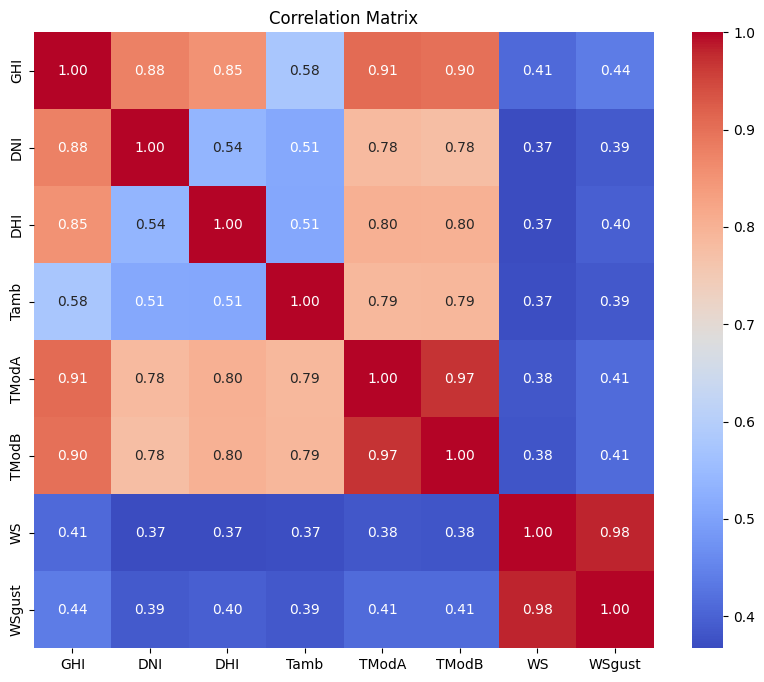

In [46]:
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

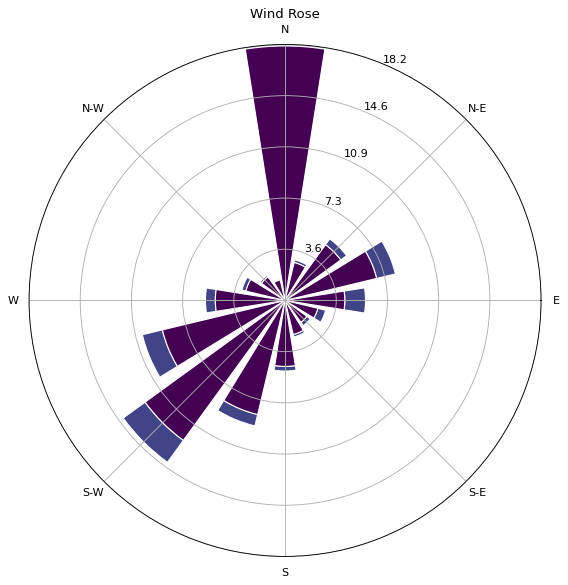

In [50]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")
plt.show()

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df=df, x='RH', y='Tamb', hue='GHI', size='BP', sizes=(10, 200), palette='viridis')
plt.title("Relative Humidity vs Temperature")
plt.show()

ValueError: Could not interpret value `RH` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

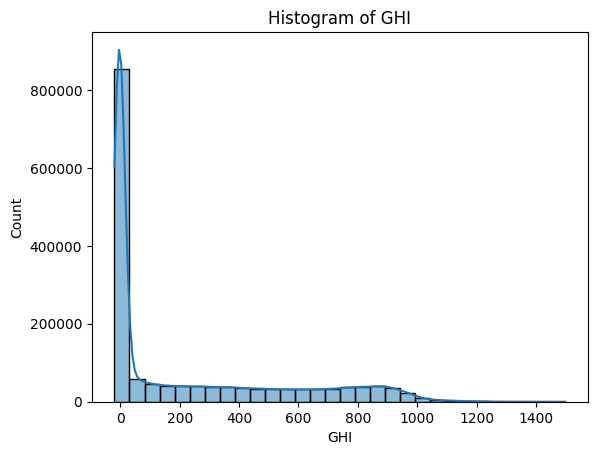

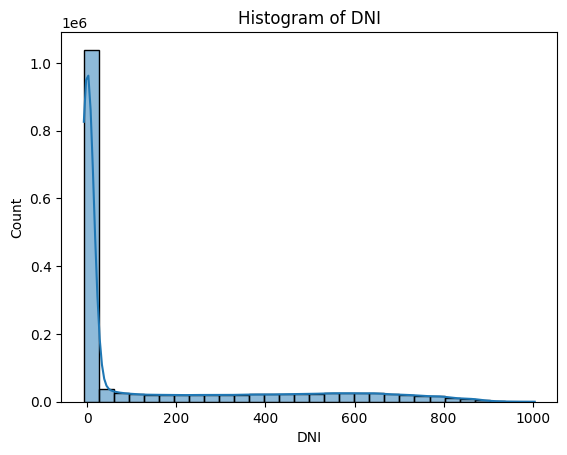

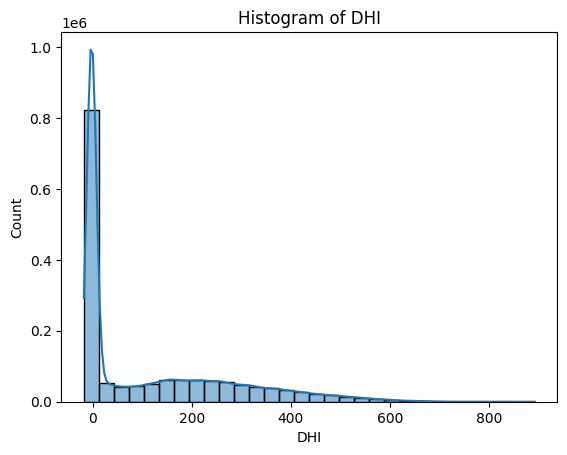

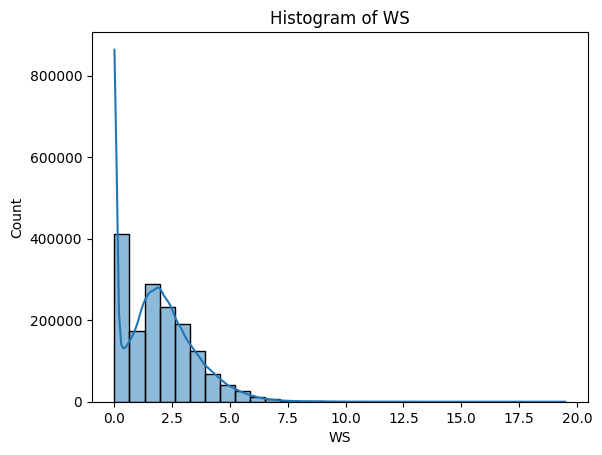

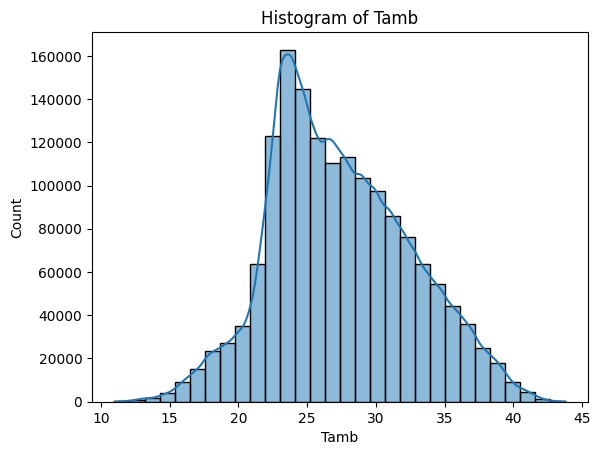

In [53]:
for col in ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

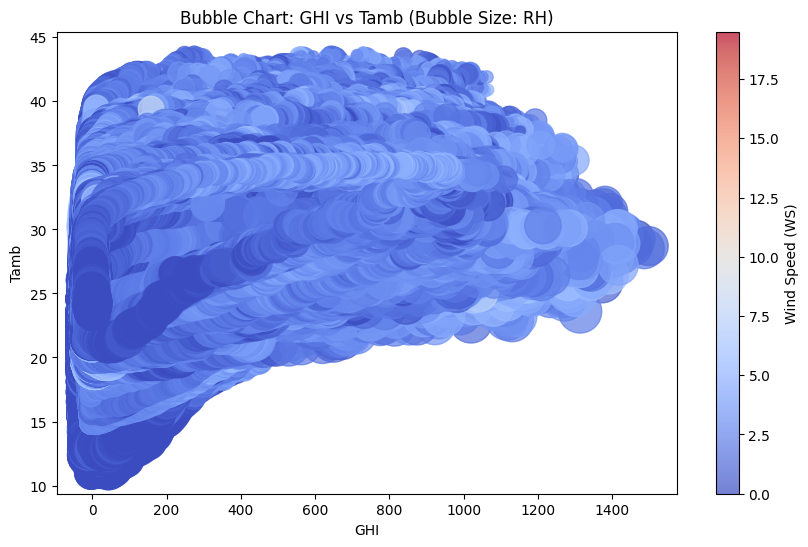

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, c=df['WS'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Wind Speed (WS)')
plt.title("Bubble Chart: GHI vs Tamb (Bubble Size: RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()